In [7]:
from fenics import *
import matplotlib.pyplot as plt

Problem: Solve the 2D Poisson equation with Dirichlet boundary conditions.

Domain: Consider a bounded domain $\Omega$ in 2D, defined as $\Omega = [a, b] \times [c, d]$, where a, b, c, and d are the bounds of the domain.

The Poisson equation is given by:

$$ \Delta u(x,y) = f(x,y) \text{ for } (x,y) \in \Omega$$

Boundary Conditions: The Dirichlet boundary conditions specify the values of the solution $u(x, y)$ on the boundary $\partial \Omega$:
$$ u(x,y) = g(x,y) \text{ for } (x,y) \in \partial\Omega $$

In this case we take:
$$ f(x,y) = -2 \pi ^2 \sin{(\pi x)} \sin{(\pi y)}$$
$$ g(x,y) = 0 $$
$$ \Omega = [-1, 1] \times [-1, 1] $$


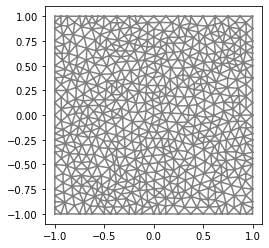

In [8]:
from mshr import *
# Define mesh and function space
domain = Rectangle(Point(-1, -1), Point(1, 1))
mesh = generate_mesh(domain, 20)
plot(mesh)

Solving linear variational problem.


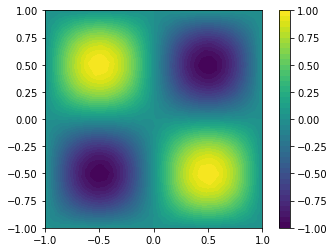

In [9]:
V = FunctionSpace(mesh, 'Lagrange', 1)

# Define the boundary condition
u_D = Constant(0.0)
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem 
u = TrialFunction(V)
v = TestFunction(V)
f = Expression('-2*pi*pi*sin(pi*x[0])*sin(pi*x[1])',degree=2)

a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Solve variational problem 
u = Function(V)
solve(a == L, u, bc)
p = plot(u)
plt.colorbar(p)
